# Credit Card Fraud

### About the dataset and the link to it.

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Link to the dataset:https://www.kaggle.com/mlg-ulb/creditcardfraud

#### Importing the libraries

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading the dataset

In [18]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Preprocessing

In [19]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Now moving on let's check the uniformity of the data types in each of the columns of our dataframe.

In [20]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Clearly, we can see that there is a uniformity in our dtpyes of each column.

#### Variable identification

In [21]:
x=df.drop('Class',axis=1).values
y=df['Class'].values

## Data Visualization

So, let's first visualize the number of fraud and no-fraud transactions.

C:\Users\Aswin P T\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

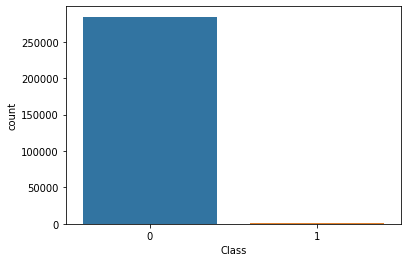

In [22]:
sns.countplot('Class', data=df)

From the above bar graph we can clearly compute that the bank's online security system is quite good with amount fraud(1) transactions being very low.

Time vs Class

<AxesSubplot:xlabel='Class', ylabel='Time'>

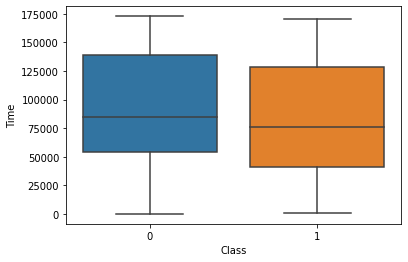

In [23]:
sns.boxplot(x="Class", y="Time", data=df)

We can clearly observe from the above data that the time taken by for a fraud or no-fraud is almost similar.

Amount vs Class

<AxesSubplot:xlabel='Class', ylabel='Amount'>

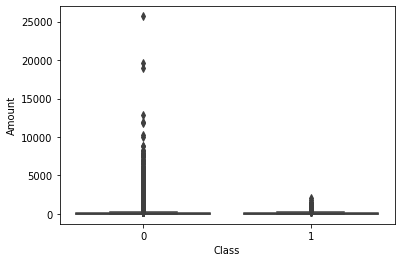

In [24]:
sns.boxplot(x="Class", y="Amount", data=df)

From the above graph we can conclude that fraud transanction take place for very small amounts so somehow it can be a relief for the bank.

#### Splitting the train and test data 

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=12529)

#### Standard Scaling the data 

In [26]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

#### Training the data on Logistic Regression model

In [27]:
from sklearn.linear_model import LogisticRegression
clf_log=LogisticRegression(random_state = 12529)
clf_log.fit(x_train,y_train)
log_pred=clf_log.predict(x_test)

#### Training the data on SVM model

In [28]:
from sklearn.svm import SVC
clf_svm = SVC(kernel = 'rbf', random_state = 12529)
clf_svm.fit(x_train, y_train)
svm_pred=clf_svm.predict(x_test)

#### Training the data on Random Forest model

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 12529)
clf_rf.fit(x_train, y_train)
rf_pred=clf_rf.predict(x_test)

#### Training the data on K Nearest Neighbours model

In [30]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
clf_knn.fit(x_train,y_train)
knn_pred=clf_knn.predict(x_test)

## Testing the accuracy

#### Making the confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, log_pred)
print("Log Reg for train:test at 70:30 \n",cm1)

cm2 = confusion_matrix(y_test, svm_pred)
print("SVM for train:test at 70:30 \n",cm2)

cm3 = confusion_matrix(y_test, rf_pred)
print("Rf Clf for train:test at 70:30 \n",cm3)

cm4 = confusion_matrix(y_test, knn_pred)
print("KNN for train:test at 70:30 \n",cm4)

Log Reg for train:test at 70:30 
 [[85299    12]
 [   43    89]]
SVM for train:test at 70:30 
 [[85307     4]
 [   41    91]]
Rf Clf for train:test at 70:30 
 [[85304     7]
 [   23   109]]
KNN for train:test at 70:30 
 [[85298    13]
 [   24   108]]


In [32]:
x1=(cm1[0][0]+cm1[1][1])/np.sum(cm1)
x2=(cm2[0][0]+cm2[1][1])/np.sum(cm2)
x3=(cm3[0][0]+cm3[1][1])/np.sum(cm3)
x4=(cm4[0][0]+cm4[1][1])/np.sum(cm4)
print("Accuracy of Logistic regression with 80:20 train test split is ",x1)
print("Accuracy of SVM with 70:30 train test split is ",x2)
print("Accuracy of Random Forest with 70:30 train test split is ",x3)
print("Accuracy of KNN with 70:30 train test split is ",x4)

Accuracy of Logistic regression with 80:20 train test split is  0.9993562960102056
Accuracy of SVM with 70:30 train test split is  0.9994733330992591
Accuracy of Random Forest with 70:30 train test split is  0.9996488887328394
Accuracy of KNN with 70:30 train test split is  0.9995669627705019


As we can clearly observe that the model with highest accuracy on test data is given by Random Forest.